In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 

In [138]:
df = pd.read_csv('./data/Car_Insurance_Claim.csv')

In [57]:
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [58]:
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [59]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [140]:
for i in df["INCOME"].unique():
    mu = df[df["INCOME"]==i]["CREDIT_SCORE"].mean()
    df.loc[(df["INCOME"]==i) & (df["CREDIT_SCORE"].isna()),"CREDIT_SCORE"]=mu


In [142]:
for i in df["MARRIED"].unique():
    mu = df[df["MARRIED"]==i]["ANNUAL_MILEAGE"].mean()
    df.loc[(df["MARRIED"]==i) & (df["ANNUAL_MILEAGE"].isna()),"ANNUAL_MILEAGE"]=mu

In [143]:
df.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CREDIT_SCORE', ylabel='Density'>

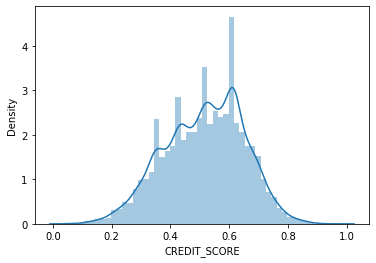

In [144]:
sns.distplot(df['CREDIT_SCORE'])

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANNUAL_MILEAGE', ylabel='Density'>

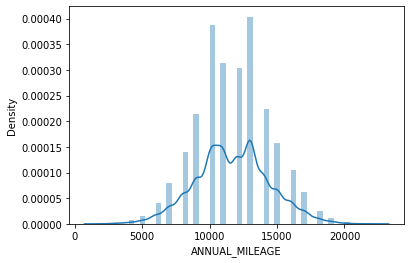

In [146]:
sns.distplot(df['ANNUAL_MILEAGE'])

In [148]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [155]:
ros = RandomOverSampler(random_state=42)

In [158]:
obj_cols = [i for i in df.columns if df[i].dtype == 'O']
label_enc = LabelEncoder()
for i in obj_cols:
    df[i] = label_enc.fit_transform(df[i])

In [159]:
def standardscaler(x_train, x_test):
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test

In [160]:
def best_model(X, y, scaler, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)
    
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
        
    X_train, X_test = scaler(X_train, X_test)
    
    y_train = np.asarray(y_train)
    y_test = np.asarray(y_test)
    
    model = algo()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    training_score = model.score(X_train, y_train)
    acc = accuracy_score(y_test, predictions)
    con = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f'Training Score: {training_score}')
    print(f'Accuracy Score: {acc}')
    print(f'Confusion Matrix: {con}')
    print(f'Classification Report: {report}')
    return acc, training_score

In [162]:
X = df.iloc[:, :-1]
y = df['OUTCOME']
x_ros, y_ros = ros.fit_resample(X, y)
y_ros.value_counts()

0.0    6867
1.0    6867
Name: OUTCOME, dtype: int64

In [165]:
list_algo = [KNeighborsClassifier, DecisionTreeClassifier, RandomForestClassifier]

list_of_accuracy = []
list_of_score = []

for i in list_algo:
    accuracyscore, trainingscore = best_model(x_ros, y_ros, standardscaler, i)
    list_of_accuracy.append(accuracyscore)
    list_of_score.append(trainingscore) 

Training Score: 0.8733009708737864
Accuracy Score: 0.8034362259755388
Confusion Matrix: [[1320  413]
 [ 262 1439]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.83      0.76      0.80      1733
         1.0       0.78      0.85      0.81      1701

    accuracy                           0.80      3434
   macro avg       0.81      0.80      0.80      3434
weighted avg       0.81      0.80      0.80      3434

Training Score: 1.0
Accuracy Score: 0.8878858474082703
Confusion Matrix: [[1432  252]
 [ 133 1617]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.92      0.85      0.88      1684
         1.0       0.87      0.92      0.89      1750

    accuracy                           0.89      3434
   macro avg       0.89      0.89      0.89      3434
weighted avg       0.89      0.89      0.89      3434

Training Score: 1.0
Accuracy Score: 0.9050669772859639
Confusion Matrix: [[1494  231]

In [167]:
acc_df = pd.DataFrame()
acc_df['Algo'] = ['KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier']
acc_df['standard_acc'] = list_of_accuracy
acc_df['standard_training'] = list_of_score
acc_df

,Algo,standard_acc,standard_training
0,KNeighborsClassifier,0.803436,0.873301
1,DecisionTreeClassifier,0.887886,1.000000
2,RandomForestClassifier,0.905067,1.000000
